<a href="https://colab.research.google.com/github/envirodatascience/final-project-wildfire/blob/main/Clean_GIF_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import standard packages
import pandas as pd
import numpy as np

#import plotting packages
import geopandas as gpd
from plotnine import *
import plotnine

#import stats packages
import scipy.stats as stats
import statsmodels.api as sm

#import animation packages
import matplotlib.pyplot as plt
import io
import os
from PIL import Image as PILImage
from IPython.display import display, Image
import imageio


In [ ]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload fire severity data
! unzip /content/drive/MyDrive/mtbs_perims_DD.zip #unpacks zipped folder

Archive:  /content/drive/MyDrive/mtbs_perims_DD.zip
replace mtbs_perims_DD.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.cpg      
replace mtbs_perims_DD.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.dbf      
replace mtbs_perims_DD.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.prj      
replace mtbs_perims_DD.sbn? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.sbn      
replace mtbs_perims_DD.sbx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.sbx      
replace mtbs_perims_DD.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.shp      y

replace mtbs_perims_DD.shp.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: mtbs_perims_DD.shp.xml  
replace mtbs_perims_DD.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mtbs_perims_DD.shx      
replace mtbs_perims_DD_ISO_metadata.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mt

In [ ]:
shape = "mtbs_perims_DD.shp"
df = gpd.read_file(shape) #reads in shape file

In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30331 entries, 0 to 30330
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Event_ID    30331 non-null  object        
 1   irwinID     6264 non-null   object        
 2   Incid_Name  30331 non-null  object        
 3   Incid_Type  30331 non-null  object        
 4   Map_ID      30331 non-null  int64         
 5   Map_Prog    30331 non-null  object        
 6   Asmnt_Type  30331 non-null  object        
 7   BurnBndAc   30331 non-null  int64         
 8   BurnBndLat  30331 non-null  object        
 9   BurnBndLon  30331 non-null  object        
 10  Ig_Date     30331 non-null  datetime64[ms]
 11  Pre_ID      22056 non-null  object        
 12  Post_ID     30331 non-null  object        
 13  Perim_ID    2878 non-null   object        
 14  dNBR_offst  30331 non-null  int64         
 15  dNBR_stdDv  30331 non-null  int64         
 16  NoData_T    30

In [ ]:
df.head()

In [ ]:
df['State'] = df['Event_ID'].str[:2] #create state column from event ID
df['State'].unique()

In [ ]:
df_state = df.pop('State')
df.insert(0,'State',df_state) #move state column to front
df.head()

In [ ]:
df['Year'] = df['Ig_Date'].dt.year #create a year column
df.head()

In [ ]:
df['Incid_Type'].unique() #check included incident types

In [ ]:
#load in state boundary data
! unzip /content/drive/MyDrive/cb_2018_us_state_500k.zip #unpacks zipped folder

Archive:  /content/drive/MyDrive/cb_2018_us_state_500k.zip
replace cb_2018_us_state_500k.shp.ea.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.shp.ea.iso.xml  
replace cb_2018_us_state_500k.shp.iso.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.shp.iso.xml  
replace cb_2018_us_state_500k.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.shp  
replace cb_2018_us_state_500k.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.shx  
replace cb_2018_us_state_500k.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.dbf  
replace cb_2018_us_state_500k.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cb_2018_us_state_500k.prj  
replace cb_2018_us_state_500k.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: cb_2018_us_state_500k.cpg  


In [ ]:
shp = "cb_2018_us_state_500k.shp"
df_states = gpd.read_file(shp) #reads in shape file
df_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [ ]:
#call california boundary
california = df_states[df_states['NAME'] == 'California']

In [ ]:
#Zoom in on California
CA_df = df[df['State'] == 'CA']

CA_df.head()

,State,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry,Year
13,CA,CA3601111879719850712,None,TULARE 4,Wildfire,4752,MTBS,Initial,1290,36.011,...,62,-9999,-970,-150,90,233,425,None,"POLYGON ((-118.78172 35.99641, -118.78252 35.9...",1985
36,CA,CA3544311877719850503,None,ADELAIDE,Wildfire,4776,MTBS,Initial,1054,35.443,...,2,-9999,-970,-150,50,300,9999,None,"POLYGON ((-118.7822 35.45334, -118.78119 35.45...",1985
37,CA,CA3672712076819850609,None,PONOCHE 2,Wildfire,4777,MTBS,Initial (SS),7508,36.727,...,-9999,-9999,9999,9999,-30,-9999,-9999,None,"POLYGON ((-120.79613 36.74672, -120.79633 36.7...",1985
38,CA,CA3590312056319850702,None,LOWES,Wildfire,4778,MTBS,Extended,2708,35.903,...,33,-9999,-970,-150,140,265,450,None,"POLYGON ((-120.571 35.89591, -120.57104 35.895...",1985
39,CA,CA3673911825219850706,None,ONION,Wildfire,4779,MTBS,Extended,8583,36.739,...,-34,-9999,-970,-150,-50,300,9999,grass fire hard to tell the perimeter,"POLYGON ((-118.22475 36.77746, -118.22551 36.7...",1985


In [ ]:
CA_df["dNBR_offst"].max() #determine severity max

200

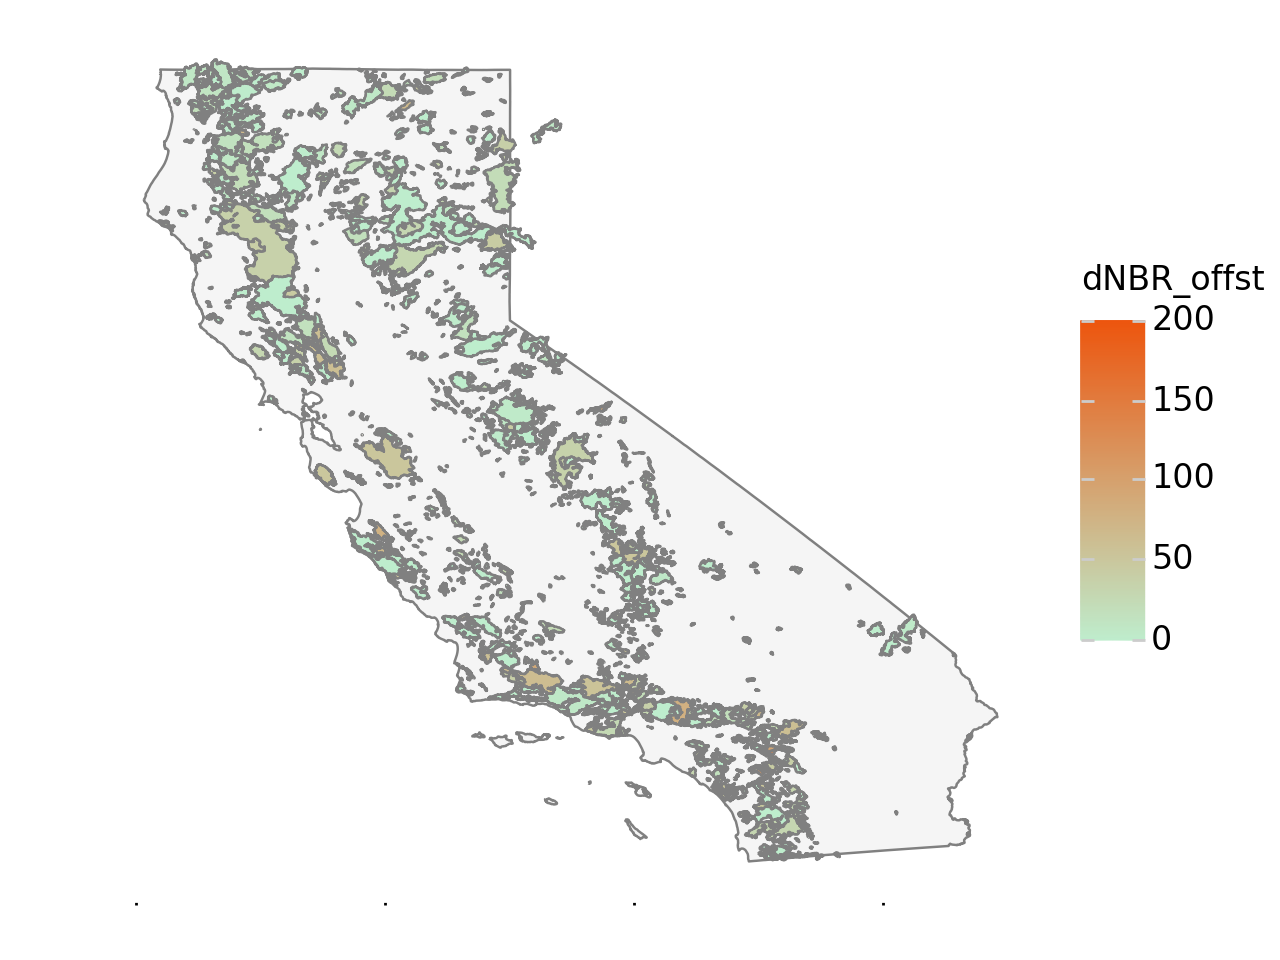

In [ ]:
#plot all CA fires according to severity
(ggplot()
  + geom_map(california, fill= 'whitesmoke', color = 'grey')
  + geom_map(CA_df, aes(geometry = 'geometry', fill = 'dNBR_offst'), color = 'grey')
  + scale_fill_gradientn(colors = ["#beedcd", "#ed550e"],limits = [0, 200])
  + labs(fill='dNBR_offst')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

In [ ]:
#Define animation constants
OUTPUT_DIR = "frames" #create directory to hold frames
CA_GIF = "map_animation.gif" #create final output file
FIG_WIDTH = 10 #set standard size for each animation frame
FIG_HEIGHT = 8 #set standard size for each animation frame
DPI = 100 #set standard resolution
FPS = 1 #set frames per second

In [ ]:
#define years for animation
years = sorted(CA_df['Year'].unique())

In [ ]:
#create CA frame boundary
min_x, min_y, max_x, max_y = california.total_bounds

#create 5% buffer around frame
buffer_x = (max_x - min_x) * 0.05
buffer_y = (max_y - min_y) * 0.05

#extend CA frame boundary using buffer
min_x -= buffer_x
min_y -= buffer_y
max_x += buffer_x
max_y += buffer_y

In [ ]:
#create a png for each year

frame_paths = [] #create empty frames to fill

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

for year in years: #create frame for individual year
    # Create filename
    frame_path = os.path.join(OUTPUT_DIR, f"frame_{year}.png")
    frame_paths.append(frame_path)

    # Generate plot for year
    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
    year_df = CA_df[CA_df['Year'] == year]

    # Add california
    california.boundary.plot(ax=ax, color='black', linewidth=1) #plot boundary
    california.plot(ax=ax, color='lightgray', alpha=0.5)  # Fill with light gray

    # Then plot the data if there is any for this year
    if not year_df.empty:
        year_df.plot(column='dNBR_offst', ax=ax,
                    cmap=plt.cm.RdYlGn_r,
                    vmin=0, vmax=200,
                    edgecolor='grey',
                    legend=True)

    ax.set_xlim(min_x, max_x) #set defined axis limits with buffer
    ax.set_ylim(min_y, max_y) #set defined axis limits with buffer

    ax.set_title(f'Year: {year}', fontsize=14)      # Set dynamic title
    ax.axis('off')                                  # Remove axes
    plt.tight_layout()

    # Save to file
    plt.savefig(frame_path, dpi=DPI)
    plt.close(fig)

<ipython-input-47-e117dc1a3c6f>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


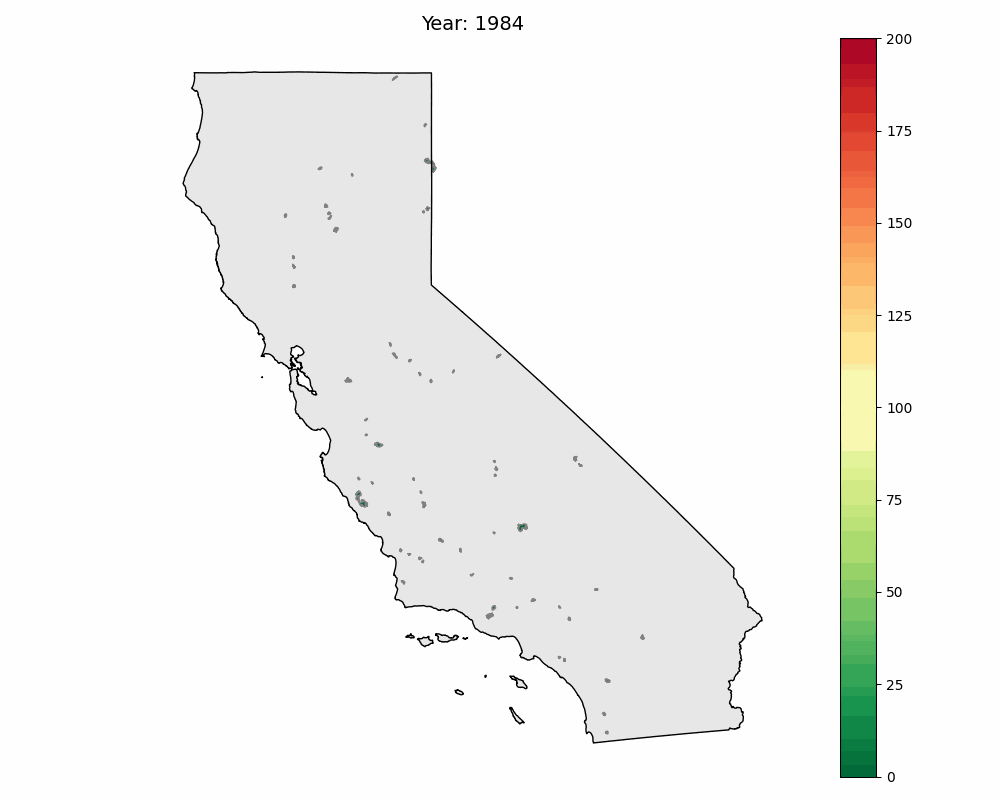

In [ ]:
#combine yearly pngs into gif using imageio

images = []
for path in frame_paths:
    images.append(imageio.imread(path))

imageio.mimsave(CA_GIF, images, fps=FPS) #fill CA_GIF with set of images

display(Image(filename=CA_GIF))